<a href="https://colab.research.google.com/github/nPr0nn/Machine-Learning-Playground/blob/main/Yolov8_FishLateral.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 606.2/606.2 kB 7.6 MB/s eta 0:00:00


In [36]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [33]:
from google.colab import drive
from ultralytics import YOLO
import os

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Yolo Training

In [30]:
GLOBAL_DIR = '/content/gdrive/Shareddrives/Recod-CIIMAR/Playground-Lucas/FishLateral'
DATA_DIR   = os.path.join(GLOBAL_DIR, 'data')
CONFIG_DIR = os.path.join(GLOBAL_DIR, 'config.yaml')

In [24]:
EPOCHS     = 3
IMG_SIZE   = 640

In [34]:
model = YOLO('yolov8n-seg.pt')
model.train(data=CONFIG_DIR, epochs=EPOCHS, imgsz=IMG_SIZE)

Ultralytics YOLOv8.0.147 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolov8n-seg.pt, data=/content/gdrive/Shareddrives/Recod-CIIMAR/Playground-Lucas/FishLateral/config.yaml, epochs=3, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torch

# Save and Display Results


In [42]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [43]:
!scp -r /content/runs '/content/gdrive/Shareddrives/Recod-CIIMAR/Playground-Lucas/FishLateral'

In [37]:
def display(display_list):
  plt.figure(figsize=(15, 15))
  title = ['Input Image', 'True Mask', 'Predicted Mask']
  for i in range(len(display_list)):
    plt.subplot(1, len(display_list), i+1)
    plt.title(title[i])
    plt.imshow(display_list[i])
    plt.axis('off')
  plt.show()


In [50]:
def get_predicted_mask(model, img_path):
  results = model.predict(img_path)
  mask_torch = results[0].masks[0].data[0]
  mask = mask_torch.cpu().numpy()
  return mask

In [52]:
test_images_file_names = os.listdir(os.path.join(DATA_DIR, 'images', 'test'))
test_masks_file_names  = os.listdir(os.path.join(DATA_DIR, 'masks', 'test'))

test_images_file_names.sort()
test_masks_file_names.sort()


image 1/1 /content/gdrive/Shareddrives/Recod-CIIMAR/Playground-Lucas/FishLateral/data/images/test/image_E1_N108_Umm_L238_S203_H53_W148p2_X2500.png: 640x640 1 fish, 42.6ms
Speed: 22.9ms preprocess, 42.6ms inference, 17.7ms postprocess per image at shape (1, 3, 640, 640)


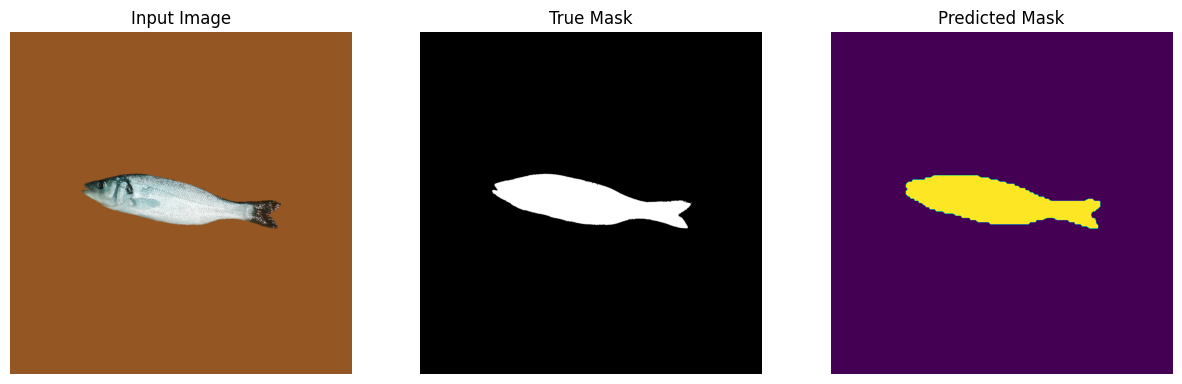


image 1/1 /content/gdrive/Shareddrives/Recod-CIIMAR/Playground-Lucas/FishLateral/data/images/test/image_E1_N112_Umm_L231_S199_H47_W120p8_X2500.png: 640x640 1 fish, 11.3ms
Speed: 4.6ms preprocess, 11.3ms inference, 3.4ms postprocess per image at shape (1, 3, 640, 640)


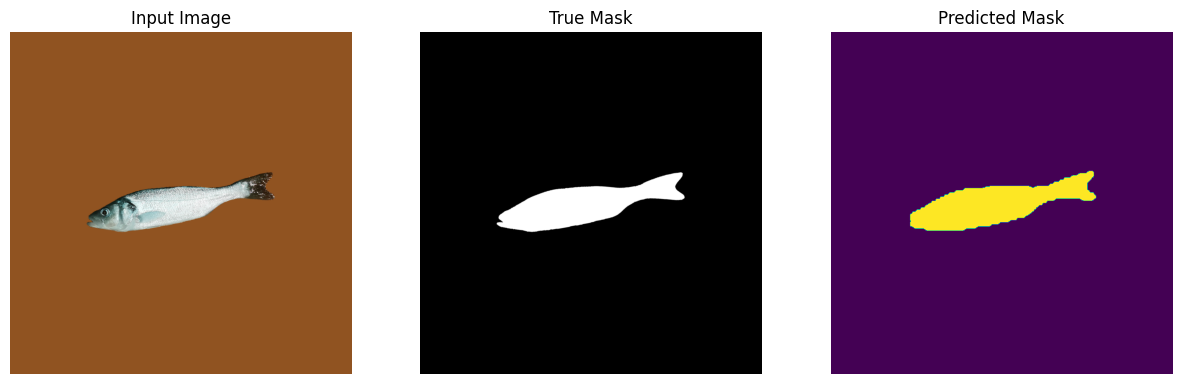


image 1/1 /content/gdrive/Shareddrives/Recod-CIIMAR/Playground-Lucas/FishLateral/data/images/test/image_E1_N114_Umm_L236_S204_H47_W140p6_X2500.png: 640x640 1 fish, 10.1ms
Speed: 3.5ms preprocess, 10.1ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)


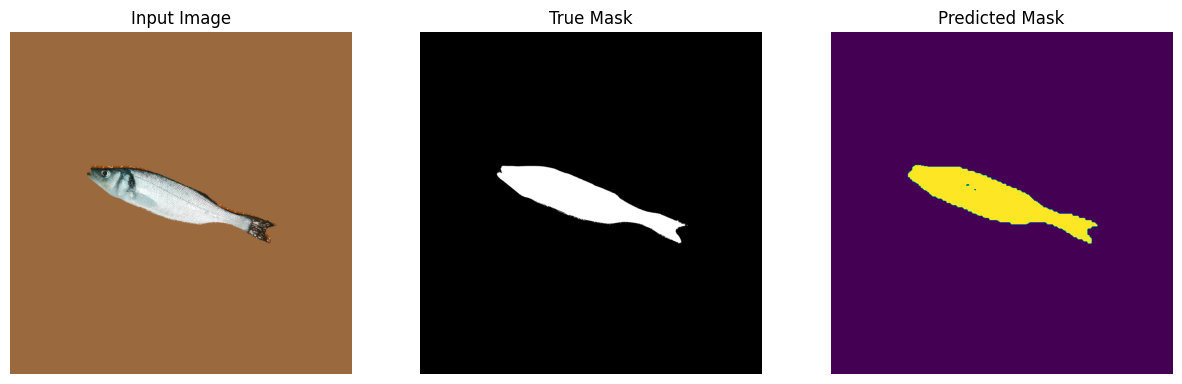


image 1/1 /content/gdrive/Shareddrives/Recod-CIIMAR/Playground-Lucas/FishLateral/data/images/test/image_E1_N120_Umm_L218_S186_H49_W124p6_X2500.png: 640x640 1 fish, 10.1ms
Speed: 4.1ms preprocess, 10.1ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)


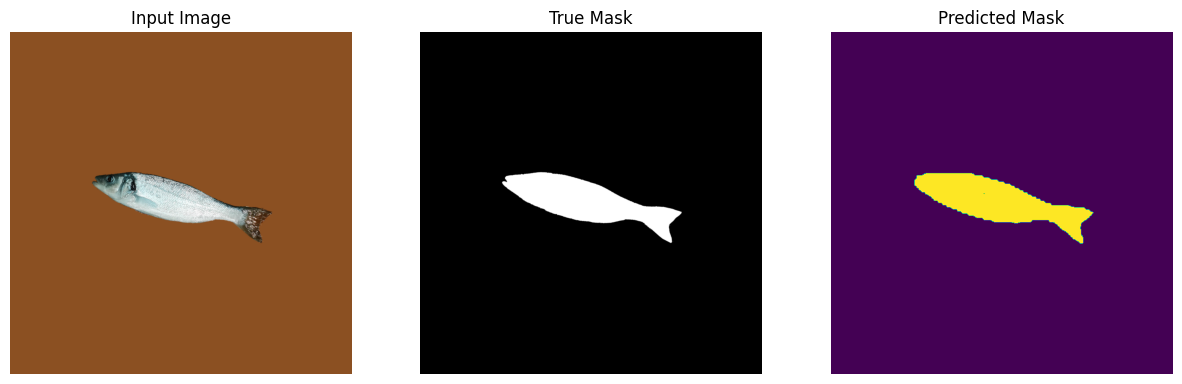


image 1/1 /content/gdrive/Shareddrives/Recod-CIIMAR/Playground-Lucas/FishLateral/data/images/test/image_E1_N128_Umm_L245_S211_H50_W143p9_X2500.png: 640x640 1 fish, 10.1ms
Speed: 3.2ms preprocess, 10.1ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)


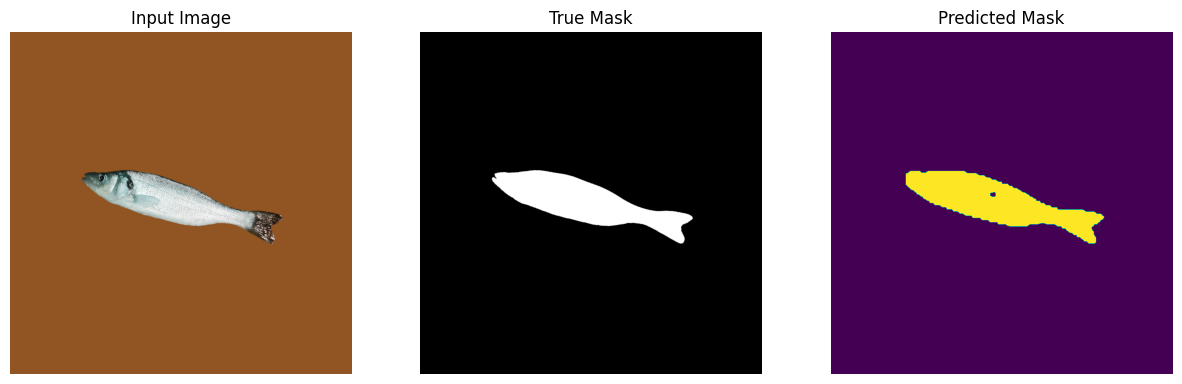

In [54]:
N = 5
for i in range(N):
  img_path = os.path.join(DATA_DIR, 'images', 'test', test_images_file_names[i])
  mask_path = os.path.join(DATA_DIR, 'masks', 'test', test_masks_file_names[i])

  original_image = cv2.imread(img_path)
  true_mask      = cv2.imread(mask_path)
  predicted_mask = get_predicted_mask(model, img_path)

  display([original_image, true_mask, predicted_mask])
